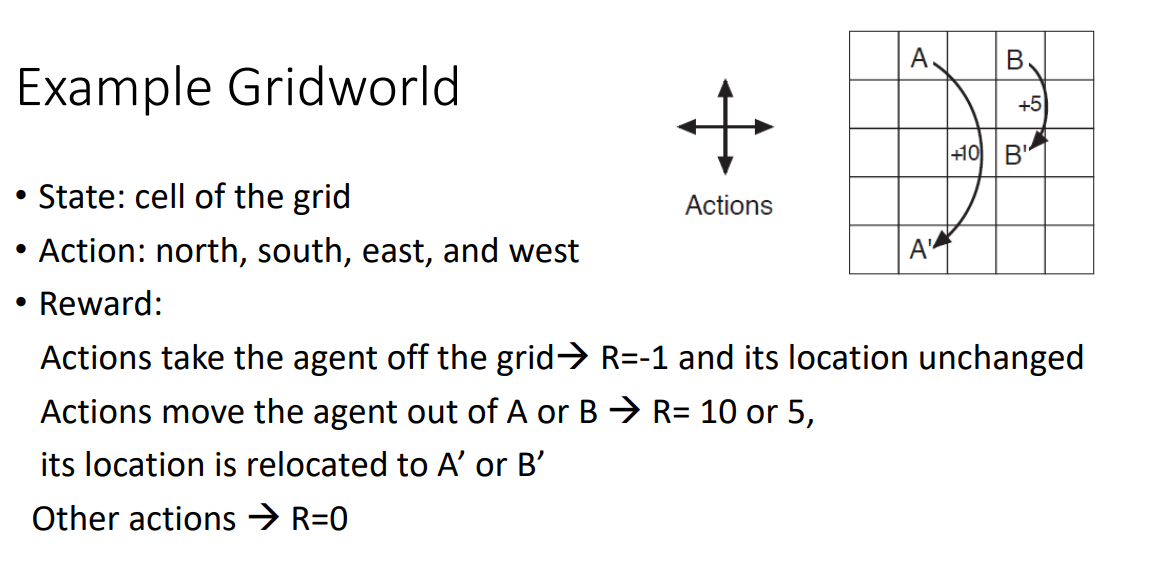

In [ ]:
import numpy as np
import numpy.random as rd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.table import Table

WORLD_SIZE = 5
A_POS = [0, 1]
A_PRIME_POS = [4, 1]
B_POS = [0, 3]
B_PRIME_POS = [2, 3]
DISCOUNT = 0.9


# left, up, right, down_POS = [0, 3]
B_PRIME_POS = [2, 3]
DISCOUNT = 0.9


_POS = [0, 3]
B_PRIME_POS = [2, 3]
DISCOUNT = 0.9


# left, up, right, down
ACTIONS = [np.array([0, -1]),
           np.array([-1, 0]),
           np.array([0, 1]),
           np.array([1, 0])]
ACTION_PROB = 0.25

def step(state, action):
    if state == A_POS:
        return A_PRIME_POS, 10
    if state == B_POS:
        return B_PRIME_POS, 5

    state = np.array(state)
    next_state = (state + action).tolist()
    x, y = next_state
    if x < 0 or x >= WORLD_SIZE or y < 0 or y >= WORLD_SIZE:
        reward = -1.0
        next_state = state
    else:
        reward = 0
    return next_state, reward

def draw_image(image):
    fig, ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax, bbox=[0, 0, 1, 1])

    nrows, ncols = image.shape
    width, height = 1.0 / ncols, 1.0 / nrows

    # Add cells
    for (i,j), val in np.ndenumerate(image):
        # Index either the first or second item of bkg_colors based on
        # a checker board pattern
        idx = [j % 2, (j + 1) % 2][i % 2]
        color = 'white'

        tb.add_cell(i, j, width, height, text=val, 
                    loc='center', facecolor=color)

    # Row Labels...
    for i, label in enumerate(range(len(image))):
        tb.add_cell(i, -1, width, height, text=label+1, loc='right', 
                    edgecolor='none', facecolor='none')
    # Column Labels...
    for j, label in enumerate(range(len(image))):
        tb.add_cell(-1, j, width, height/2, text=label+1, loc='center', 
                           edgecolor='none', facecolor='none')
    ax.add_table(tb)


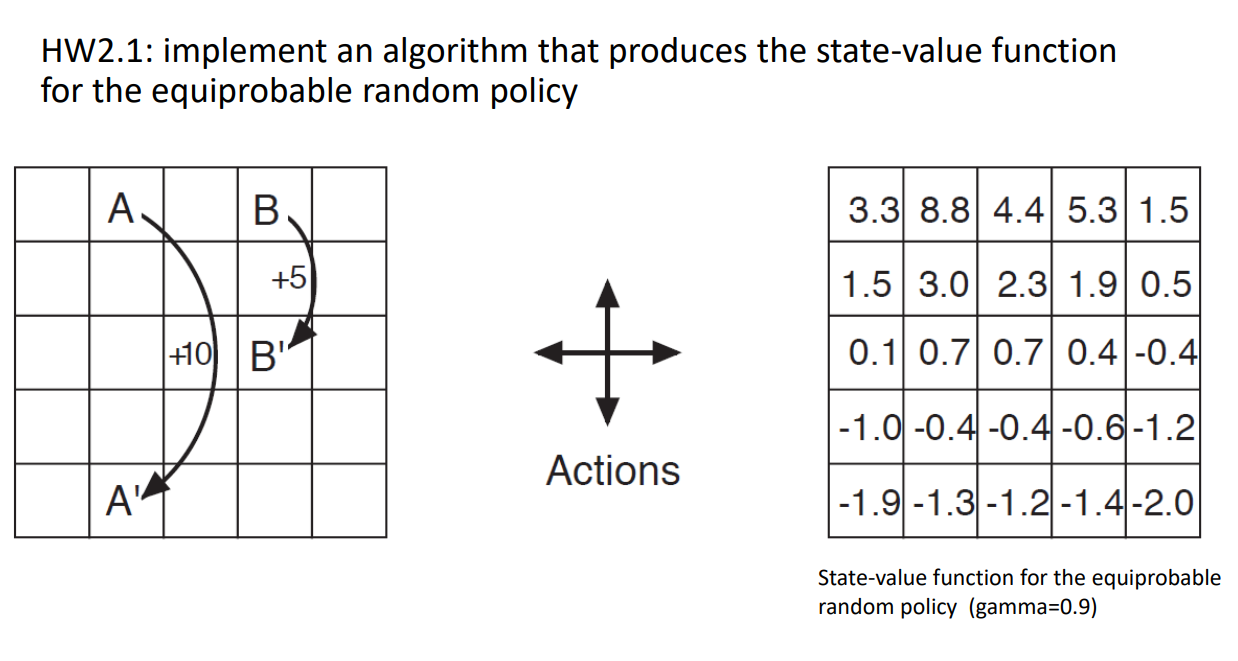

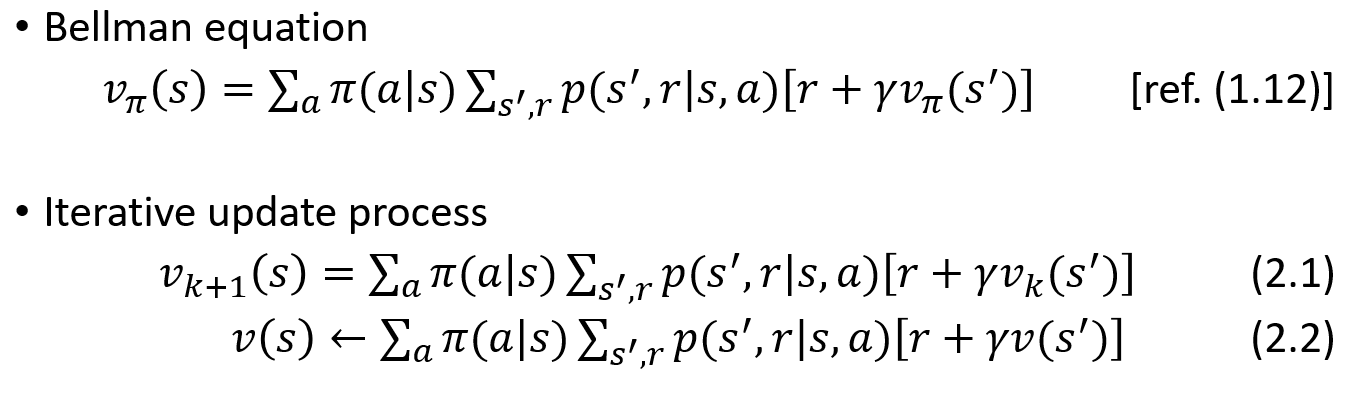

In [ ]:
#hint: random policy, stationary enviroment.
def figure_2_1():
    value = np.zeros((WORLD_SIZE, WORLD_SIZE))
    while True:
        # keep iteratiing until convergence
        ####################CODE############################
        new_value = np.zeros(value.shape)
        for i in range(WORLD_SIZE):
          for j in range(WORLD_SIZE):
            for action in ACTIONS:
              [next_state,reward] = step([i,j],action)
        # bellman equation
              new_value[i][j] += ACTION_PROB*(reward+DISCOUNT*value[next_state[0]][next_state[1]])
   
        if np.sum(np.abs(value - new_value)) < 1e-4:
            draw_image(np.round(new_value, decimals=2))
            from google.colab import files #google.colab only
            plt.savefig("2_1.png")
            files.download("2_1.png") #google.colab only
            plt.close()
            break
        value = new_value
        ####################CODE############################

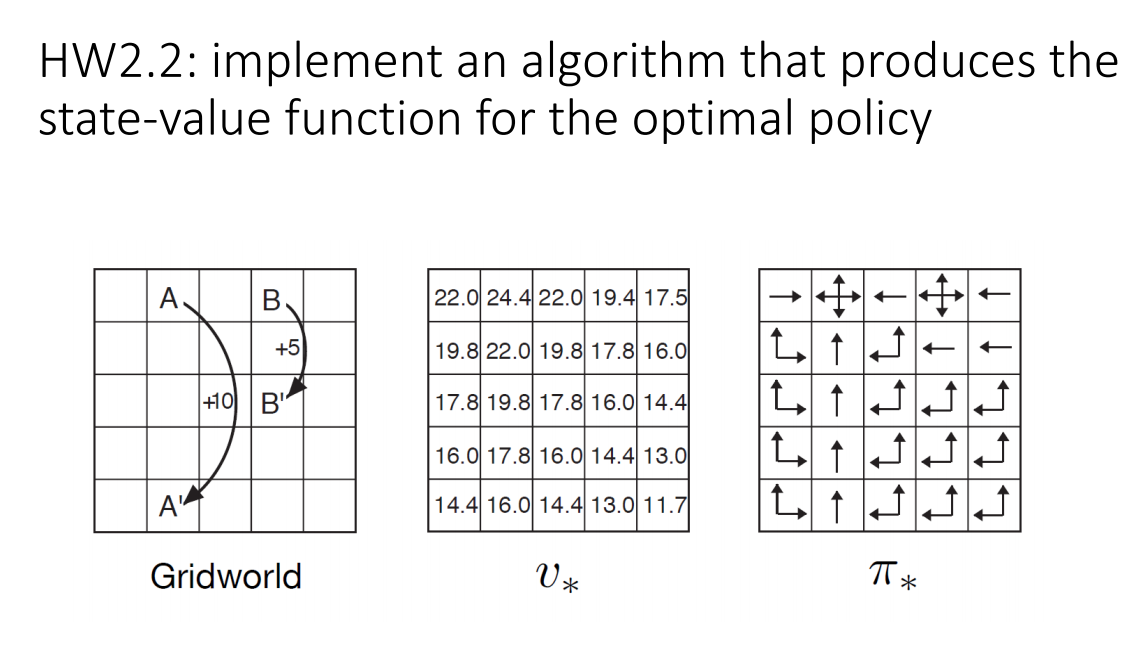

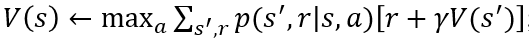

In [1]:
#hint: greedy action selection, notice discounted rate = 0.9
def figure_2_2():

    value = np.zeros((WORLD_SIZE, WORLD_SIZE))
    while True:
        # keeping iteratiing until convergence
        ####################CODE############################
        new_value = np.zeros(value.shape)
        
        # optimal value function 
        for i in range(WORLD_SIZE):
          for j in range(WORLD_SIZE):
            action_value = []
            for action in ACTIONS:
              [next_state,reward] = step([i,j],action)
              action_value.append(reward+DISCOUNT*value[next_state[0]][next_state[1]])
        # bellman equation
            new_value[i][j] = np.max(action_value)
            
        if np.sum(np.abs(new_value - value)) < 1e-4:
            draw_image(np.round(new_value, decimals=2))
            from google.colab import files #google.colab only
            plt.savefig("2_2.png")
            files.download("2_2.png") #google.colab only
            plt.close()
            break
        value = new_value
        ####################CODE############################

# Result1(40%)

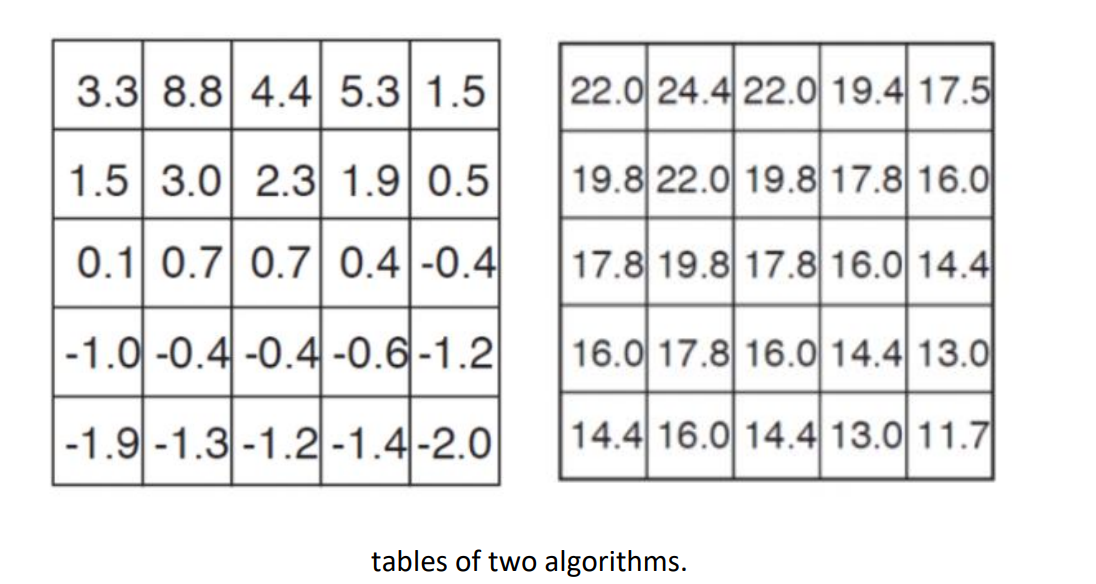

In [ ]:

if __name__ == '__main__':
    figure_2_1()
    figure_2_2()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#HW2.3 state-action value 
  In the same enviroment, use dynamic programming to find state-action value on optimal policy.

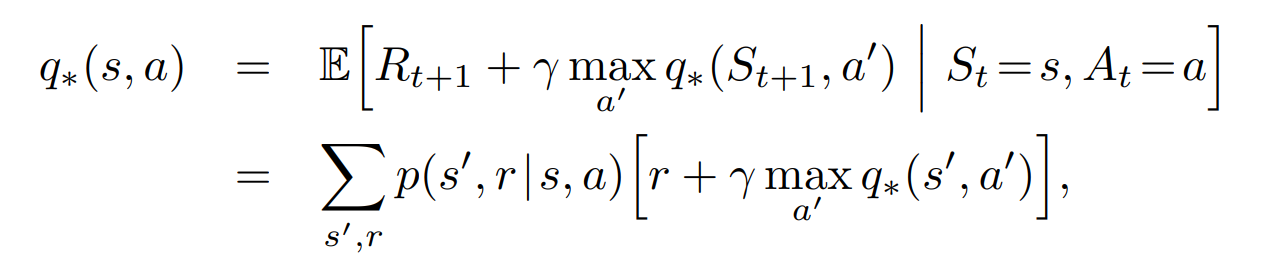

In [ ]:
def drawTable(data):
  fig = plt.figure()
  ax = plt.Axes(fig, [0., 0., 1., 1.])
  ax.set_axis_off()
  fig.add_axes(ax)
  plt.gca().invert_yaxis()
  for i in range(5):
    for j in range(5):
      plt.plot((i,i),(j,j+1),'-k')
      plt.plot((i,i+1),(j,j+1),'-k')
      plt.plot((i,i+1),(j,j),'-k')
      plt.plot((i+1,i),(j,j+1),'-k')
      plt.plot((i+1,i+1),(j,j+1),'-k')
      plt.plot((i,i+1),(j+1,j+1),'-k')
      temp = max(data[j][i])
      if data[j][i][0]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j], [i,j+1]], color='yellow'))
      if data[j][i][1]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j], [i+1,j]], color='yellow'))
      if data[j][i][2]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i+1,j], [i+1,j+1]], color='yellow'))
      if data[j][i][3]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j+1], [i+1,j+1]], color='yellow'))

      plt.text(i+0.2,j+0.5,'%.2f' %data[j][i][0], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.5,j+0.2,'%.2f' %data[j][i][1], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.8,j+0.5,'%.2f' %data[j][i][2], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.5,j+0.8,'%.2f' %data[j][i][3], verticalalignment='center', horizontalalignment='center')
  from google.colab import files #google.colab only
  plt.savefig("3.png")
  files.download("3.png") #google.colab only

In [ ]:
def evaluateActionValue():
    q_value = rd.rand(WORLD_SIZE, WORLD_SIZE, len(ACTIONS))
    while True:
        # keeping iteratiing until convergence
        ####################CODE############################
        new_q_value = np.zeros(q_value.shape)

        for i in range(WORLD_SIZE):
          for j in range(WORLD_SIZE):
            state_action_value = []
            k = 0
            for action in ACTIONS:
              [next_state,reward] = step([i,j],action)
              new_q_value[i][j][k] = (reward+DISCOUNT*np.max(q_value[next_state[0]][next_state[1]]))
              k = k + 1
            
        # optimal value function 

        if np.sum(np.abs(new_q_value - q_value)) < 1e-4:
          return new_q_value

        q_value = new_q_value
        ####################CODE############################

    return q_value

#Result(20%)

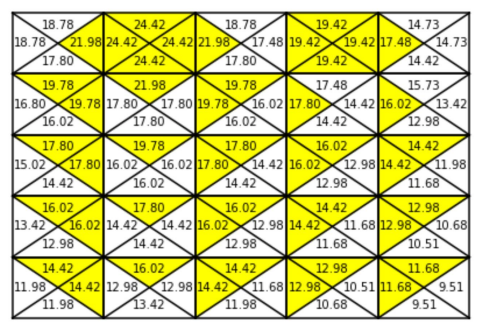

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

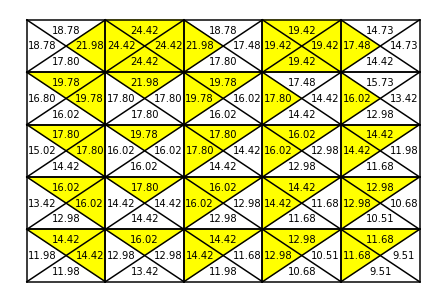

In [ ]:
drawTable(evaluateActionValue())

#Experiments and Analysis(40%)
1. Vary the discount rate(gamma) on Hw2.2, what happens? please plot it.(15%)
2. Base on Hw2.2, What will happen if the discount rate is set on  to 0 or 1? why(15%)
2. How do you check whether the state values are reasonable or not?(10%) 



Ans 1.

當discount rate增加時，各狀態的state value數值大小也會同步增加，然而狀態與狀態之間差異百分比卻會下降。

當discount rate減少時，各狀態的state value數值大小則會同步減少，狀態與狀態之間差異百分比會上升。

由下圖dicount rate = 0.3與0.9的關係變化可看出。

$\bullet\,Discount\,rate\,=\,0.3$

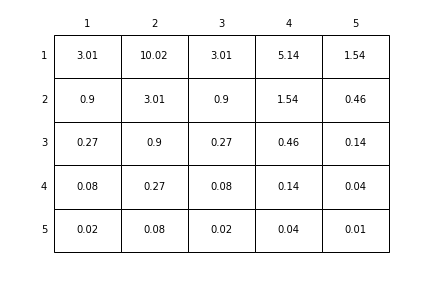

$\bullet\,Discount\,rate\,=\,0.9$

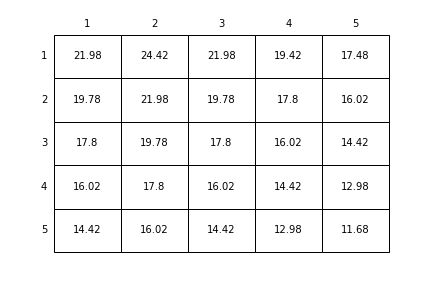

Ans 2.

當discount rate=0時，為短視近利Myopic的情況，因為只考慮當前的reward，因此只有在獲得reward處的state value不為0，其他地方的state value皆為0，如下圖所示。

$\bullet\,Discount\,rate\,=\,0$

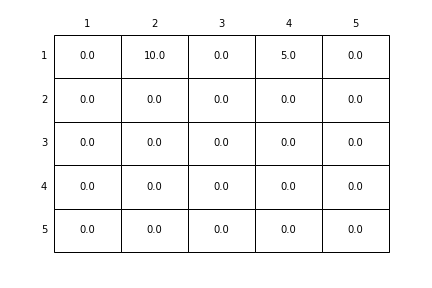

當discount rate=1時，為重視未來Farsighted的情況，因為考慮未來所有狀態的reward，在計算時discount rate=1無法收斂，因此無法計算出此狀態下的state value，故無法生成網格圖grid world。

Ans 3.


當discount rate大於0且小於1時，所有狀態皆可計算出各自的state value，因此只要discount rate不為0或1的極端情況，計算出來的state value皆為合理值，但實務上discount rate依舊以0.9為多。